# Dogs and Cats

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfdf
import PIL
import kaggle
import os
import pathlib
import shutil
import zipfile

In [45]:
import absl.logging

# Set TensorFlow log level to suppress INFO and WARNING messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Set absl logging level to suppress all but errors
absl.logging.set_verbosity(absl.logging.ERROR)

# Your TensorFlow/Keras code here


In [11]:
kaggle.api.competition_download_files('dogs-vs-cats',path = '.')

In [12]:
zip = 'dogs-vs-cats.zip'

data_dir = pathlib.Path('./Dogs_cats_dataset')

train = './Dogs_cats_dataset/train.zip'
test = './Dogs_cats_dataset/test1.zip'

In [13]:
with zipfile.ZipFile(zip,'r') as zip_ref:
    zip_ref.extractall(data_dir)
with zipfile.ZipFile(train,'r') as zip_ref:
    zip_ref.extractall(data_dir)
with zipfile.ZipFile(test,'r') as zip_ref:
    zip_ref.extractall(data_dir)

In [14]:
cats = list(data_dir.glob('train/cat*'))
dogs = list(data_dir.glob('train/dog*'))

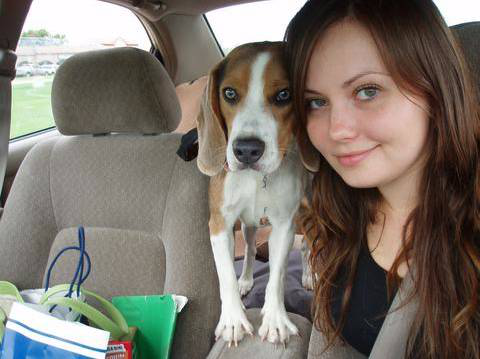

In [17]:
PIL.Image.open(str(dogs[90]))

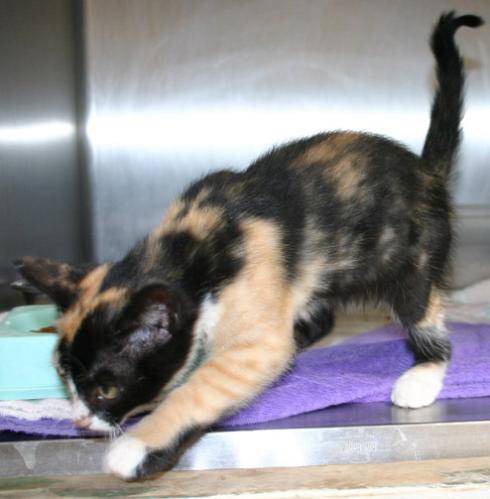

In [18]:
PIL.Image.open(str(cats[59]))

In [19]:
cat_dir = data_dir/'train/cat'
dog_dir = data_dir/'train/dog'

cat_dir.mkdir(exist_ok = True)
dog_dir.mkdir(exist_ok = True)

for cat in cats:
    shutil.move(str(cat),str(cat_dir/cat.name))
for dog in dogs:
    shutil.move(str(dog),str(dog_dir/dog.name))

In [19]:
batch_size = 16
img_height = 256
img_width = 256

In [41]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    data_dir/'train',
    validation_split = 0.3,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 25000 files belonging to 2 classes.
Using 17500 files for training.


In [42]:
ds_val = tf.keras.utils.image_dataset_from_directory(
    data_dir/'train',
    validation_split = 0.3,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 25000 files belonging to 2 classes.
Using 7500 files for validation.


In [22]:
class_names = ds_train.class_names
class_names

['cat', 'dog']

In [31]:
def normalize_img(image,label):
    # img = tf.image.resize(image,(256,256))
    return tf.cast(image,tf.float32)/255.,label
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_train = ds_train.shuffle(1000)
# ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [33]:
ds_val = ds_val.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_val = ds_val.shuffle(1000)
# ds_val = ds_val.prefetch(tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 96,kernel_size=(11,11),strides = (4,4),input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = (2,2)),
    tf.keras.layers.Conv2D(filters = 256,kernel_size=(5,5),padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = (2,2)),
    tf.keras.layers.Conv2D(filters = 384,kernel_size=(3,3),padding = 'same'),
    tf.keras.layers.Conv2D(filters = 256,kernel_size=(3,3),padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(2,activation = 'softmax')    
])
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)
model.fit(
    ds_train,
    epochs = 50,
    validation_data = ds_val
)

Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - loss: 174.0671 - sparse_categorical_accuracy: 0.5009 - val_loss: 0.7252 - val_sparse_categorical_accuracy: 0.5599
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.7073 - sparse_categorical_accuracy: 0.5907 - val_loss: 0.7187 - val_sparse_categorical_accuracy: 0.5716
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.6867 - sparse_categorical_accuracy: 0.6057 - val_loss: 0.6271 - val_sparse_categorical_accuracy: 0.6509
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 0.6554 - sparse_categorical_accuracy: 0.6229 - val_loss: 0.6216 - val_sparse_categorical_accuracy: 0.6480
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.6514 - sparse_categorical_accuracy: 0.6150 - val_loss: 0.6213 - val_sparse_categorical_accuracy: 0.6591
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 0.6287 - sparse_categorical_accuracy: 0.6466 - val_loss: 0.6786 - val_sparse_categorical_accurac

In [ ]:
294951680
364137728
3760193536
3478923264

In [39]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=[256,256,3],
    pooling=None,
)
base_model.trainable = False

In [40]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [43]:
top_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(2,activation = 'sigmoid') 
])

In [49]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=top_model(base_model.output))

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(
    ds_train,
    epochs = 5,
    validation_data = ds_val
)

Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.5464 - sparse_categorical_accuracy: 0.6877

2024-08-29 14:52:55.640406: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_198', 8 bytes spill stores, 8 bytes spill loads



1094/1094 ━━━━━━━━━━━━━━━━━━━━ 156s 137ms/step - loss: 0.5464 - sparse_categorical_accuracy: 0.6877 - val_loss: 0.3640 - val_sparse_categorical_accuracy: 0.8919
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 205s 188ms/step - loss: 0.4784 - sparse_categorical_accuracy: 0.7439 - val_loss: 0.3002 - val_sparse_categorical_accuracy: 0.9099
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 234s 214ms/step - loss: 0.4470 - sparse_categorical_accuracy: 0.7626 - val_loss: 0.2755 - val_sparse_categorical_accuracy: 0.9075
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 235s 215ms/step - loss: 0.4389 - sparse_categorical_accuracy: 0.7591 - val_loss: 0.2589 - val_sparse_categorical_accuracy: 0.9271
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 236s 215ms/step - loss: 0.4370 - sparse_categorical_accuracy: 0.7518 - val_loss: 0.2928 - val_sparse_categorical_accuracy: 0.9049


# Inception V3

In [35]:
base_model_inception = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=[256,256,3],
    pooling=None,
)

base_model_inception.trainable = False

In [36]:
top_model_Inception = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation = 'relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1024,activation = 'relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(2,activation = 'sigmoid') 
])

In [37]:
model_Inception = tf.keras.models.Model(inputs=base_model_inception.input, outputs=top_model_Inception(base_model_inception.output))

model_Inception.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

model_Inception.fit(
    ds_train,
    epochs = 30,
    validation_data = ds_val
)

Epoch 1/30


I0000 00:00:1724925889.202964   43509 service.cc:146] XLA service 0x7f2dd8003440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724925889.203439   43509 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-08-29 15:34:49.426024: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-29 15:34:50.583532: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


   1/1094 ━━━━━━━━━━━━━━━━━━━━ 5:11:27 17s/step - loss: 1.6589 - sparse_categorical_accuracy: 0.5625

I0000 00:00:1724925900.083770   43509 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 20.3894 - sparse_categorical_accuracy: 0.5379

2024-08-29 15:36:20.013850: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2434', 4 bytes spill stores, 4 bytes spill loads

2024-08-29 15:36:20.476699: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2448', 8 bytes spill stores, 8 bytes spill loads

2024-08-29 15:36:20.707885: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2441', 4 bytes spill stores, 4 bytes spill loads

2024-08-29 15:36:20.953992: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2455', 8 bytes spill stores, 8 bytes spill loads



1094/1094 ━━━━━━━━━━━━━━━━━━━━ 100s 76ms/step - loss: 20.3770 - sparse_categorical_accuracy: 0.5380 - val_loss: 0.4031 - val_sparse_categorical_accuracy: 0.9448
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 68s 62ms/step - loss: 0.3140 - sparse_categorical_accuracy: 0.9048 - val_loss: 0.1341 - val_sparse_categorical_accuracy: 0.9604
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - loss: 0.1935 - sparse_categorical_accuracy: 0.9507 - val_loss: 0.1480 - val_sparse_categorical_accuracy: 0.9428
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - loss: 0.2087 - sparse_categorical_accuracy: 0.9509 - val_loss: 0.0815 - val_sparse_categorical_accuracy: 0.9796
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - loss: 0.1982 - sparse_categorical_accuracy: 0.9603 - val_loss: 0.0855 - val_sparse_categorical_accuracy: 0.9760
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 85s 78ms/step - loss: 0.1954 - sparse_categorical_accuracy: 0.9610 - val_loss: 0.0796 - val_sparse_categorical_accura